In [206]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [207]:
# Linear algebra
import numpy as np

# Data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [208]:
Country = pd.read_csv('Country-data.csv')
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [209]:
#modifying exports, health, imports in terms of gdpp
Country['exports'] = round(Country.gdpp * (Country.exports / 100), 2)
Country['health'] = round(Country.gdpp * (Country.health / 100), 2)
Country['imports'] = round(Country.gdpp * (Country.imports / 100), 2)

In [210]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [211]:
Country.set_index('country', inplace=True)

In [212]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [213]:
#Check for null values
round(100*(Country.isnull().sum()/len(Country.index)),2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

No null values in the data 

In [214]:
Country.describe(percentiles=[0.1,0.25,0.75,0.9,0.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.732934,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.409031,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224000,36.502000,211.006000,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


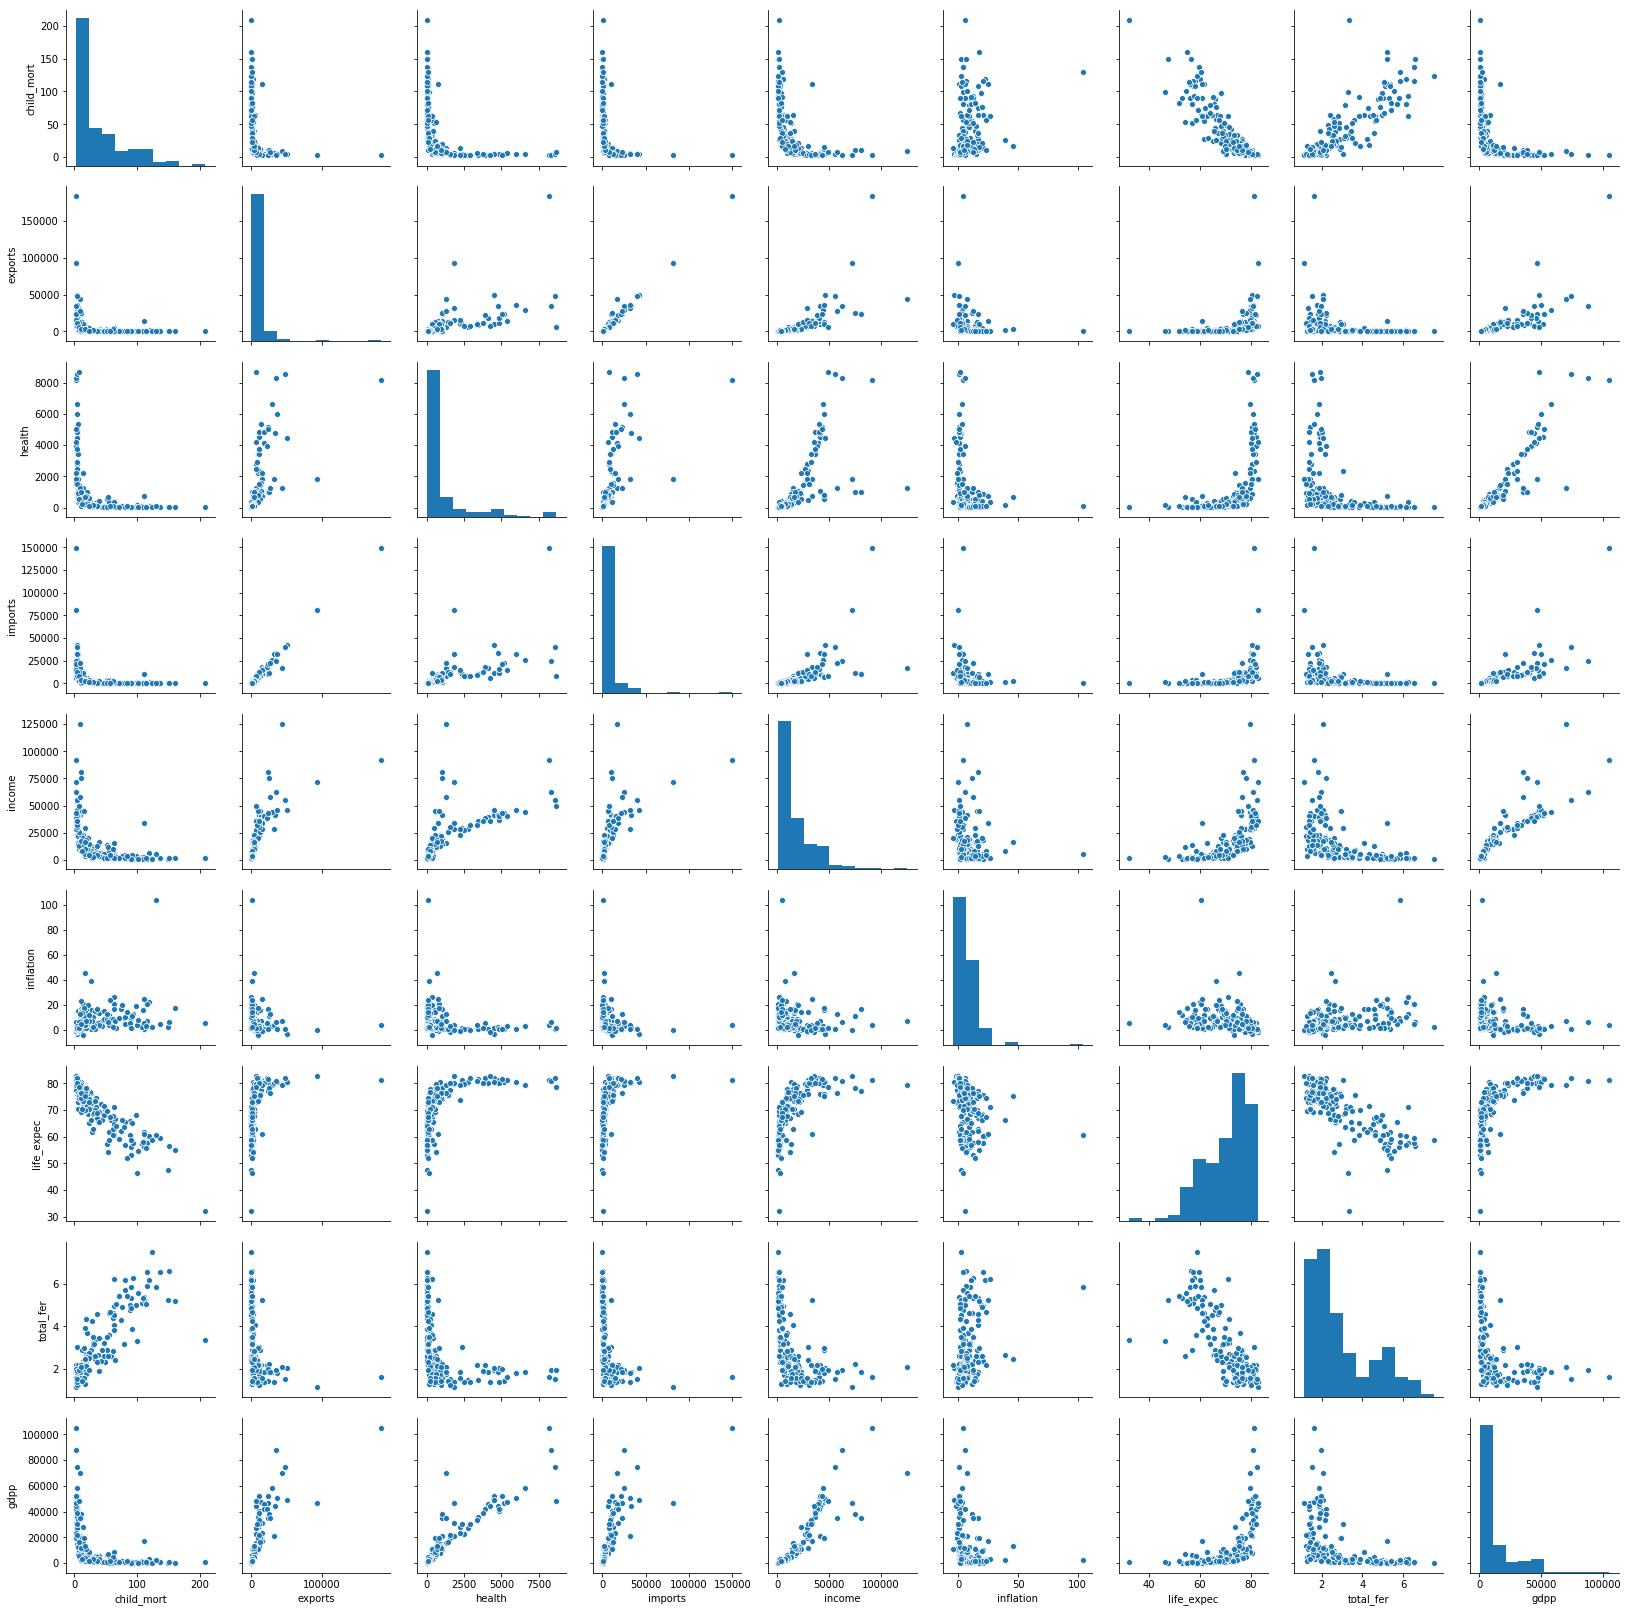

In [215]:
sns.pairplot(Country)
plt.show()

In [216]:
print(Country.duplicated().sum())

0


No duplicates in data 

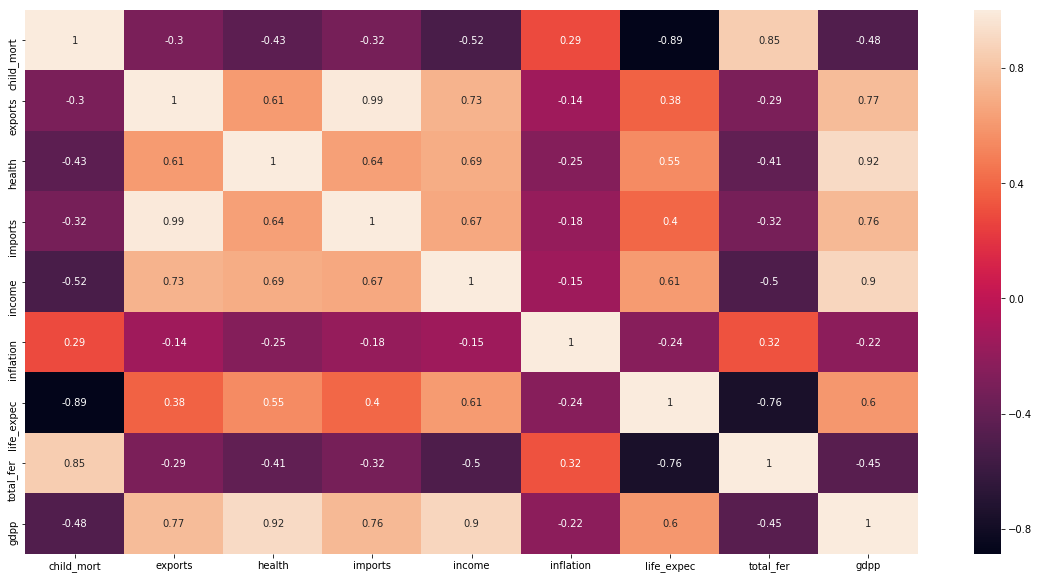

In [217]:
plt.figure(figsize = (20,10))
sns.heatmap(Country.corr(),annot = True)

In [218]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(Country)

In [219]:
Country_scaled = pd.DataFrame(Country_scaled)
Country_scaled.index = Country.index
Country_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
Country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.411011,-0.565038,-0.432275,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.350191,-0.439215,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.318526,-0.484827,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,-0.291375,-0.532366,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,-0.104331,-0.178770,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [220]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [221]:
#Doing the PCA on the train data
pca.fit_transform(Country_scaled)

array([[-2.63557432e+00,  1.47226776e+00, -5.49489008e-01, ...,
        -4.02106742e-01,  1.52253893e-02,  2.14525558e-02],
       [-2.42045083e-02, -1.42989143e+00, -1.41235066e-02, ...,
         2.62749473e-01,  3.77113689e-04, -3.38835573e-02],
       [-4.59557735e-01, -6.75495544e-01,  9.59354752e-01, ...,
         2.26680612e-01,  4.17037022e-02, -3.26635532e-02],
       ...,
       [-5.94449889e-01, -1.07633501e+00,  5.28875085e-01, ...,
         1.27676624e-01, -3.75441496e-02, -7.38598364e-02],
       [-1.80237189e+00,  5.88729598e-01,  1.18085088e+00, ...,
        -1.30849213e-01,  1.19709864e-02, -6.63324316e-03],
       [-2.64450551e+00,  1.57195317e+00, -1.74684834e-01, ...,
        -7.51162764e-01,  5.94311706e-03,  3.54067580e-02]])

In [222]:
pca.components_

array([[-0.31639186,  0.34288671,  0.35853499,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284223,  0.39998795],
       [ 0.47626736,  0.3973109 ,  0.15505296,  0.37078073,  0.12838447,
         0.22126087, -0.36981973,  0.45971521,  0.20062409],
       [-0.15001225, -0.03057363, -0.07570331, -0.07217381,  0.14576422,
         0.94841868,  0.19675172, -0.07783432,  0.01033941],
       [-0.14805191,  0.44942529, -0.59971229,  0.46179779, -0.15480591,
        -0.00762805, -0.0183948 , -0.21392811, -0.36477233],
       [ 0.10199492, -0.03853833, -0.49319962, -0.25278674,  0.79407466,
        -0.13642338, -0.15404168, -0.02033632,  0.08750155],
       [ 0.19658518, -0.03891115,  0.18069933, -0.01217971, -0.0381476 ,
         0.10840297, -0.58600966, -0.75390074,  0.0453818 ],
       [ 0.76126724, -0.01366968, -0.06461566,  0.02718243, -0.02311294,
        -0.02207666,  0.5812085 , -0.27314527, -0.04402287],
       [ 0.00644394, -0.05526375,  0.43007215,  0.13113554,  0

In [223]:
colnames = list(Country_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income
5,-0.143085,0.221261,inflation
6,0.343857,-0.369820,life_expec
7,-0.302842,0.459715,total_fer
8,0.399988,0.200624,gdpp


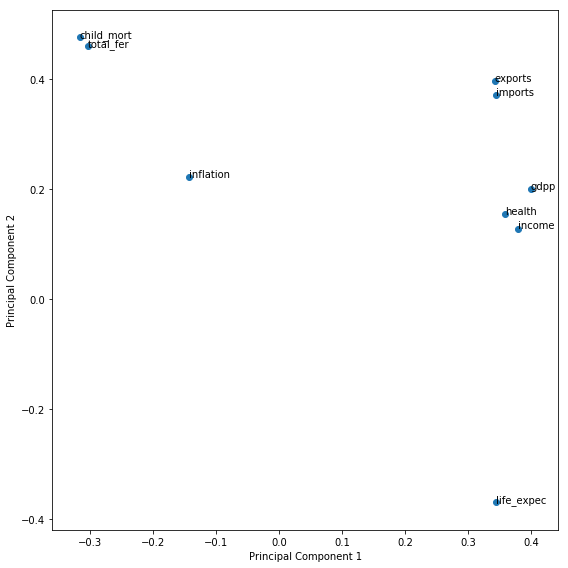

In [224]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [225]:
pca.explained_variance_ratio_

array([5.89372980e-01, 1.84451688e-01, 9.91147179e-02, 6.07227853e-02,
       3.02917242e-02, 2.45982666e-02, 9.39743642e-03, 1.55642022e-03,
       4.93981335e-04])

In [226]:
print (pca.explained_variance_ratio_.cumsum())

[0.58937298 0.77382467 0.87293939 0.93366217 0.9639539  0.98855216
 0.9979496  0.99950602 1.        ]


3 Principal components explain about 87.29% of data           
4 Principal components explain about 93.36% of data

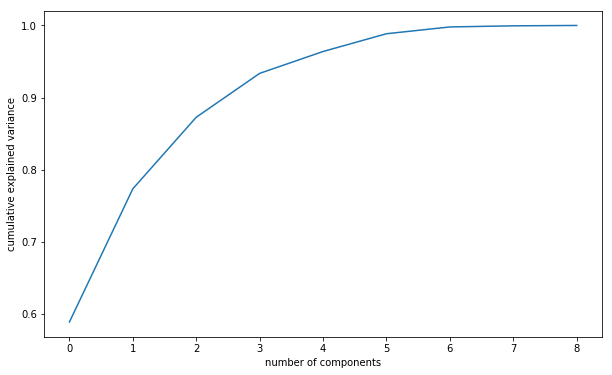

In [227]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [228]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [229]:
train_pca = pca_final.fit_transform(Country_scaled)

In [230]:
train_pca

array([[-2.63744091e+00,  1.46903834e+00, -5.41359283e-01],
       [-2.22759022e-02, -1.43189541e+00, -2.07012169e-02],
       [-4.57626597e-01, -6.73301107e-01,  9.61867351e-01],
       [-2.72452122e+00,  2.17458228e+00,  6.06686768e-01],
       [ 6.49848574e-01, -1.02437390e+00, -2.50102857e-01],
       [ 3.71969021e-02, -6.80889092e-01,  1.46696271e+00],
       [-3.32691463e-01, -1.27451684e+00,  1.76636116e-01],
       [ 3.18036154e+00, -2.50784842e-01, -1.16877439e-01],
       [ 3.81568155e+00,  2.56083525e-01, -2.70495396e-01],
       [-4.67515496e-01, -4.93492533e-01,  6.03288156e-01],
       [ 1.49875250e+00, -4.28907375e-01, -5.50237604e-01],
       [ 1.47097109e+00, -3.26795708e-01,  4.28411802e-01],
       [-1.01419938e+00, -7.11807970e-01, -1.16988443e-01],
       [ 8.45238163e-01, -1.00860623e+00, -4.17261640e-01],
       [-1.34479407e-02, -9.82186424e-01,  8.80913210e-01],
       [ 3.96087771e+00,  8.38740851e-01, -2.94077219e-01],
       [-4.02707007e-01, -9.21816157e-01

In [231]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(train_pca.transpose())

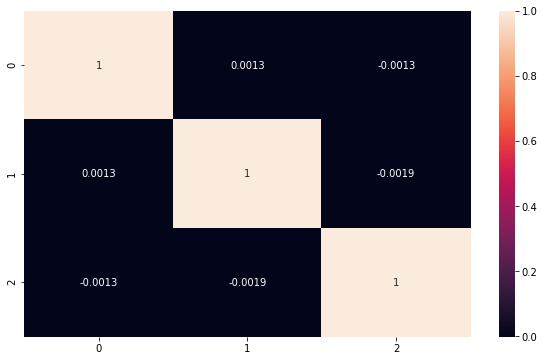

In [232]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(corrmat,annot = True)

In [233]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.001269321164512182 , min corr:  -0.0018789880585391965


In [234]:
df_pca = pd.DataFrame(train_pca).rename(columns={0: "PC1", 1: "PC2",2: "PC3"})
df_pca.index = Country_scaled.index
df_pca.head()

,PC1,PC2,PC3
country,,,
Afghanistan,-2.637441,1.469038,-0.541359
Albania,-0.022276,-1.431895,-0.020701
Algeria,-0.457627,-0.673301,0.961867
Angola,-2.724521,2.174582,0.606687
Antigua and Barbuda,0.649849,-1.024374,-0.250103


In [235]:
df_pca_bfr_outlier = df_pca.copy()

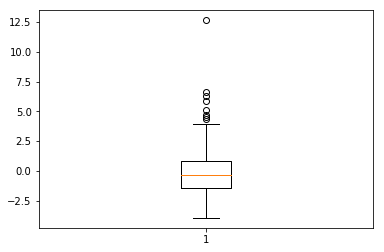

In [236]:
plt.boxplot(df_pca.PC1)
# outlier treatment for PC1
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75) 
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]

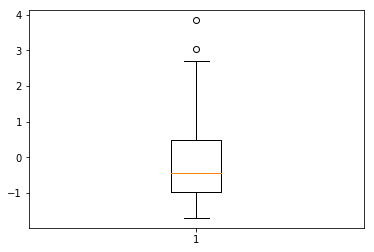

In [237]:
plt.boxplot(df_pca.PC2)
# outlier treatment for PC2
Q1 = df_pca.PC2.quantile(0.25)
Q3 = df_pca.PC2.quantile(0.75) 
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC2 >= Q1 - 1.5*IQR) & (df_pca.PC2 <= Q3 + 1.5*IQR)]

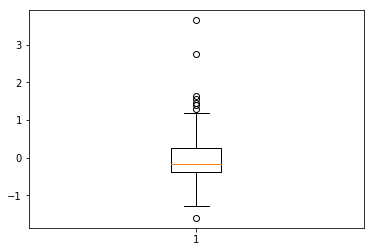

In [238]:
plt.boxplot(df_pca.PC3)
# outlier treatment for PC3
Q1 = df_pca.PC3.quantile(0.25)
Q3 = df_pca.PC3.quantile(0.75) 
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC3 >= Q1 - 1.5*IQR) & (df_pca.PC3 <= Q3 + 1.5*IQR)]

In [239]:
df_pca_aft_outlier = df_pca.copy()

In [240]:
df_pca.describe(percentiles=[0.1,0.25,0.75,0.9,0.95])

,PC1,PC2,PC3
count,149.000000,149.000000,149.000000
mean,-0.257660,-0.190923,-0.112211
std,1.755868,1.011695,0.546664
min,-3.227048,-1.696969,-1.296013
10%,-2.581984,-1.247435,-0.782436
25%,-1.517547,-1.004397,-0.397058
50%,-0.371585,-0.493493,-0.177759
75%,0.666371,0.412453,0.195525
90%,2.563426,1.462237,0.681759
95%,3.148386,1.648213,0.956420


In [241]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [242]:
hopkins(df_pca)

0.8292325248847345

In [243]:
# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [244]:
df_pca_bfr_clusters = df_pca.copy()

In [245]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

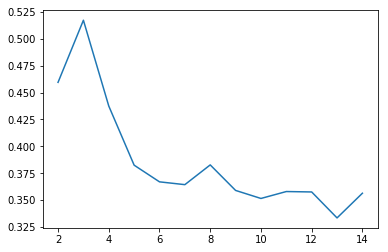

In [246]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

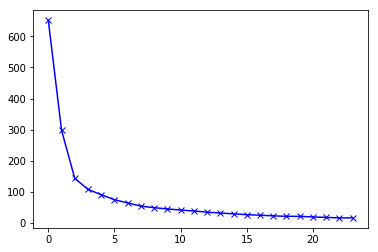

In [247]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,25)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd, 'bx-')

In [248]:
# Kmeans with K=4
model = KMeans(n_clusters = 4, max_iter=50, random_state=100)
clusters = model.fit(df_pca)

In [249]:
df_pca['cluster'] = pd.Series(clusters.labels_, index=df_pca.index)
df_pca.head()

,PC1,PC2,PC3,cluster
country,,,,
Afghanistan,-2.637441,1.469038,-0.541359,1
Albania,-0.022276,-1.431895,-0.020701,0
Algeria,-0.457627,-0.673301,0.961867,0
Angola,-2.724521,2.174582,0.606687,1
Antigua and Barbuda,0.649849,-1.024374,-0.250103,0


In [250]:
df_pca_aft_clusters = df_pca.copy()

In [251]:
clusters.labels_

array([1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 3, 0, 0, 2, 0, 1, 0, 3, 0, 3, 0,
       0, 1, 1, 3, 1, 2, 0, 1, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 2, 0, 0, 3,
       0, 1, 3, 0, 3, 2, 2, 3, 1, 0, 2, 3, 2, 0, 3, 1, 1, 3, 0, 2, 3, 3,
       0, 3, 2, 2, 0, 2, 0, 0, 3, 3, 2, 3, 3, 0, 0, 1, 1, 0, 0, 0, 3, 1,
       0, 0, 1, 2, 1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 2, 1, 0, 3, 0, 0, 0, 3,
       0, 2, 0, 0, 3, 3, 3, 0, 0, 1, 2, 2, 3, 3, 2, 2, 0, 3, 0, 2, 3, 1,
       0, 1, 3, 0, 0, 3, 1, 0, 2, 2, 2, 0, 3, 3, 0, 3, 1])

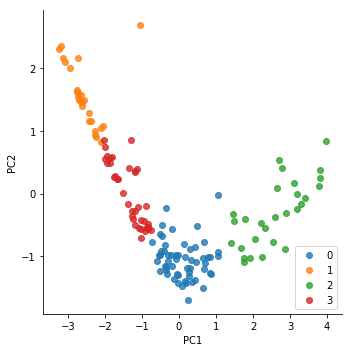

In [252]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC2", data=df_pca, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [253]:
df_pca.cluster.value_counts()

0    57
3    38
2    28
1    26
Name: cluster, dtype: int64

In [254]:
df_pca_with_original = pd.concat([df_pca,Country_scaled], axis=1)
df_pca_with_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 13 columns):
PC1           149 non-null float64
PC2           149 non-null float64
PC3           149 non-null float64
cluster       149 non-null float64
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(13)
memory usage: 18.3+ KB


In [255]:
km_clusters_child_mort = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).exports.mean())
km_clusters_health = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).health.mean())
km_clusters_imports = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).imports.mean())
km_clusters_income = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).total_fer.mean())
km_clusters_total_gdpp = pd.DataFrame(df_pca_with_original.groupby(["cluster"]).gdpp.mean())

In [256]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_total_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,-0.547065,-0.222716,-0.321336,-0.205198,-0.150752,-0.175647,0.448813,-0.621802,-0.303404
1,1,1.647374,-0.362586,-0.545976,-0.396072,-0.726091,0.220344,-1.429528,1.729089,-0.626767
2,2,-0.820165,0.433979,1.250569,0.529029,1.049207,-0.530303,1.040999,-0.791588,1.208220
3,3,0.303709,-0.364985,-0.509802,-0.379795,-0.625297,0.058356,-0.558626,0.401672,-0.580689


In [257]:
df_pca_with_original[df_pca_with_original.index == 'India']

,PC1,PC2,PC3,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
India,-1.265275,-0.273471,-0.079354,3.0,0.510593,-0.397072,-0.557934,-0.424261,-0.662566,0.113689,-0.491252,-0.230545,-0.635565


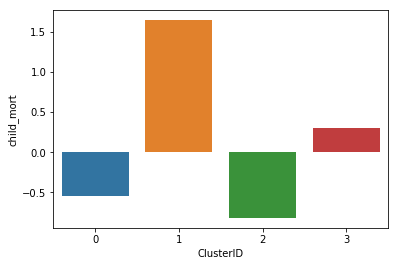

In [258]:
sns.barplot(x=df.ClusterID, y=df.child_mort)

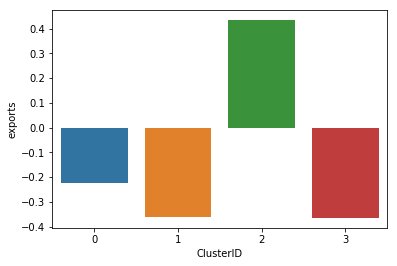

In [259]:
sns.barplot(x=df.ClusterID, y=df.exports)

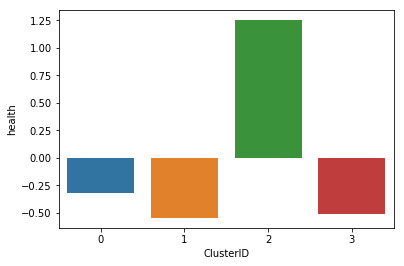

In [260]:
sns.barplot(x=df.ClusterID, y=df.health)

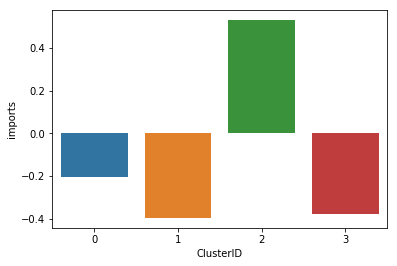

In [261]:
sns.barplot(x=df.ClusterID, y=df.imports)

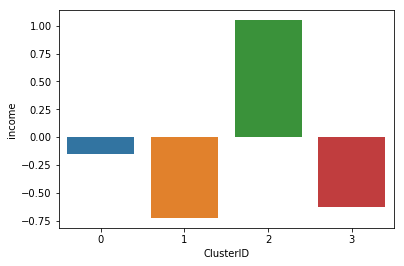

In [262]:
sns.barplot(x=df.ClusterID, y=df.income)

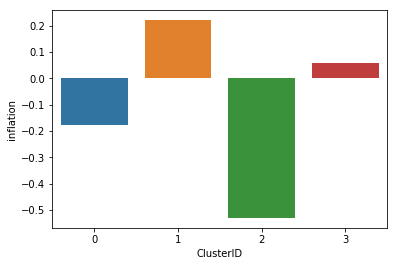

In [263]:
sns.barplot(x=df.ClusterID, y=df.inflation)

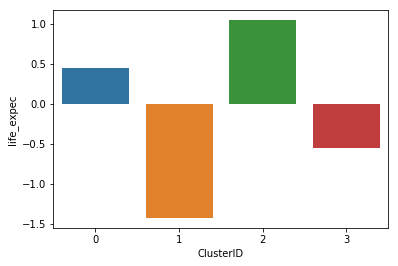

In [264]:
sns.barplot(x=df.ClusterID, y=df.life_expec)

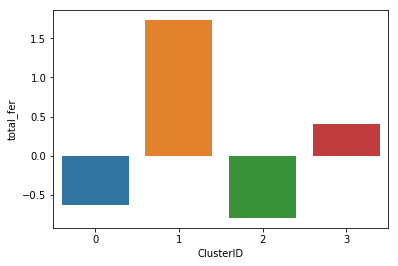

In [265]:
sns.barplot(x=df.ClusterID, y=df.total_fer)

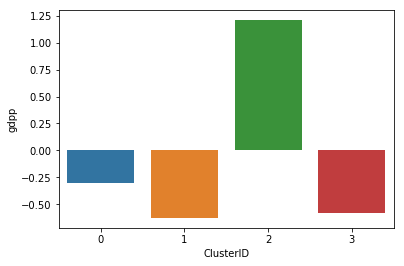

In [266]:
sns.barplot(x=df.ClusterID, y=df.gdpp)

In [267]:
df_pca.cluster.value_counts()

0    57
3    38
2    28
1    26
Name: cluster, dtype: int64

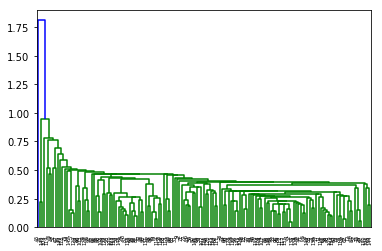

In [268]:
# heirarchical clustering
mergingss = linkage(df_pca_bfr_clusters, method = "single", metric='euclidean')
dendrogram(mergingss)
plt.show()

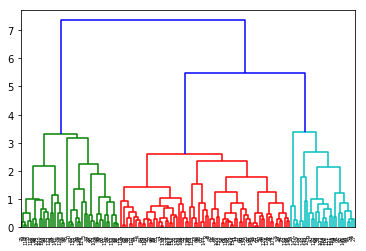

In [269]:
mergingsc = linkage(df_pca_bfr_clusters, method = "complete", metric='euclidean')
dendrogram(mergingsc)
plt.show()

In [270]:
df_pca_hir_clusters = df_pca_bfr_clusters.copy()

In [271]:
clusterCut = pd.Series(cut_tree(mergingsc, n_clusters = 3).reshape(-1,))
pd.Series(clusterCut)
df_pca_hir_clusters['cluster'] = pd.Series(cut_tree(mergingsc, n_clusters = 3).reshape(-1,), index=df_pca.index)
df_pca_hir_clusters

,PC1,PC2,PC3,cluster
country,,,,
Afghanistan,-2.637441,1.469038,-0.541359,0
Albania,-0.022276,-1.431895,-0.020701,1
Algeria,-0.457627,-0.673301,0.961867,1
Angola,-2.724521,2.174582,0.606687,0
Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
Armenia,-0.332691,-1.274517,0.176636,1
Australia,3.180362,-0.250785,-0.116877,2
Austria,3.815682,0.256084,-0.270495,2
Azerbaijan,-0.467515,-0.493493,0.603288,1


In [272]:
df_pca_hir_clusters.cluster.value_counts()

1    76
0    44
2    29
Name: cluster, dtype: int64

In [273]:
df_pca_hir_clusters[df_pca_hir_clusters.cluster == 0]

,PC1,PC2,PC3,cluster
country,,,,
Afghanistan,-2.637441,1.469038,-0.541359,0
Angola,-2.724521,2.174582,0.606687,0
Benin,-2.365986,1.168460,-1.235257,0
Botswana,-1.130959,0.396783,-0.239304,0
Burkina Faso,-2.753873,1.662328,-0.838531,0
Burundi,-2.764067,1.627039,-0.289502,0
Cameroon,-2.441430,1.283682,-1.218570,0
Chad,-3.188893,2.352278,-1.063464,0
Comoros,-1.949913,0.604587,-0.768860,0


In [274]:
df_pca_hir_original = pd.concat([df_pca_hir_clusters,Country_scaled], axis=1)
df_pca_hir_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 13 columns):
PC1           149 non-null float64
PC2           149 non-null float64
PC3           149 non-null float64
cluster       149 non-null float64
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(13)
memory usage: 18.3+ KB


In [275]:
hir_clusters_child_mort = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).child_mort.mean())
hir_clusters_exports = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).exports.mean())
hir_clusters_health = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).health.mean())
hir_clusters_imports = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).imports.mean())
hir_clusters_income = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).income.mean())
hir_clusters_inflation = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).inflation.mean())
hir_clusters_life_expec = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).life_expec.mean())
hir_clusters_total_fer = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).total_fer.mean())
hir_clusters_total_gdpp = pd.DataFrame(df_pca_hir_original.groupby(["cluster"]).gdpp.mean())

In [276]:
df_hir = pd.concat([pd.Series([0,1,2]), hir_clusters_child_mort, hir_clusters_exports, hir_clusters_health, hir_clusters_imports, hir_clusters_income, hir_clusters_inflation, hir_clusters_life_expec, hir_clusters_total_fer, hir_clusters_total_gdpp], axis=1)
df_hir.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df_hir

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,1.223082,-0.361626,-0.525088,-0.390716,-0.681905,0.197048,-1.210250,1.344680,-0.604219
1,1,-0.394274,-0.268071,-0.374860,-0.254313,-0.298600,-0.151018,0.260691,-0.452065,-0.387069
2,2,-0.814670,0.429134,1.197422,0.513992,1.063540,-0.486436,1.026665,-0.765387,1.178513


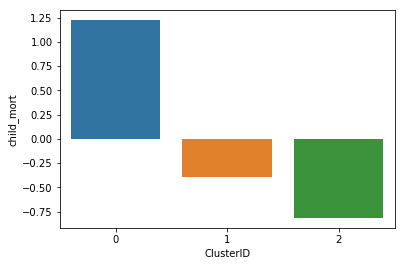

In [277]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.child_mort)

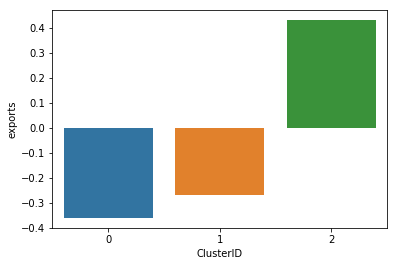

In [278]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.exports)

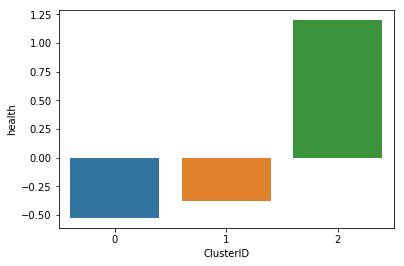

In [279]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.health)

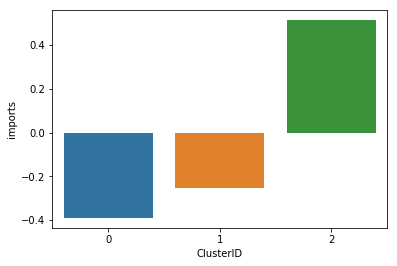

In [280]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.imports)

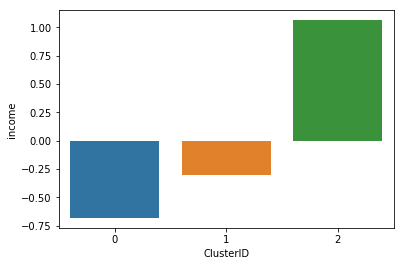

In [281]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.income)

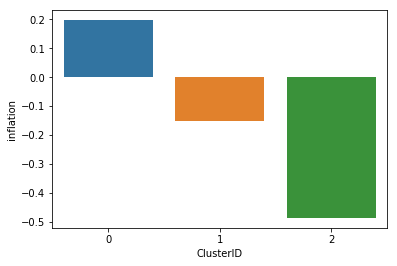

In [282]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.inflation)

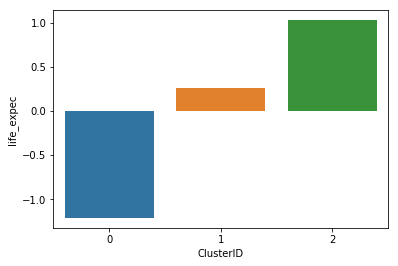

In [283]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.life_expec)

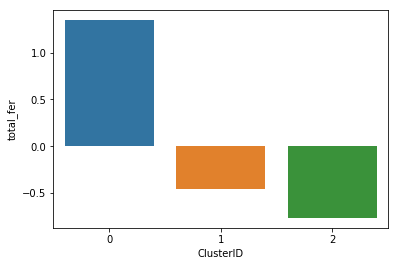

In [284]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.total_fer)

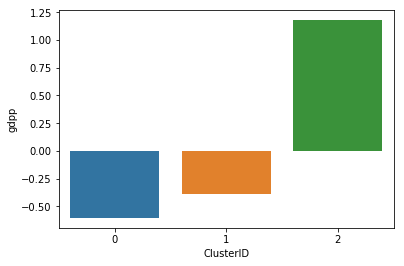

In [285]:
sns.barplot(x=df_hir.ClusterID, y=df_hir.gdpp)

All the barplots show that cluster 0 is having low income per person, high child mortality, 
low gdpp, high inflation, high total fertility, low life expectancy and low in imports, exports and health.
This is the cluster which requires attention from NGO

Merging outlier back to clustered data

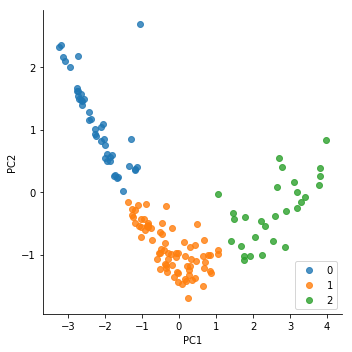

In [286]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC2", data=df_pca_hir_clusters, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [287]:
df_pca_with_outliers = pd.concat([df_pca_hir_clusters.loc[:,['PC1', 'PC2', 'PC3']],df_pca_bfr_outlier]).drop_duplicates()
df_pca_with_outliers['cluster'] = pd.Series(cut_tree(mergingsc, n_clusters = 3).reshape(-1,), index=df_pca.index)
df_pca_with_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Venezuela
Data columns (total 4 columns):
PC1        167 non-null float64
PC2        167 non-null float64
PC3        167 non-null float64
cluster    149 non-null float64
dtypes: float64(4)
memory usage: 6.5+ KB


In [288]:
df_pca_with_outliers.cluster = df_pca_with_outliers.cluster.fillna(3).astype('int64')

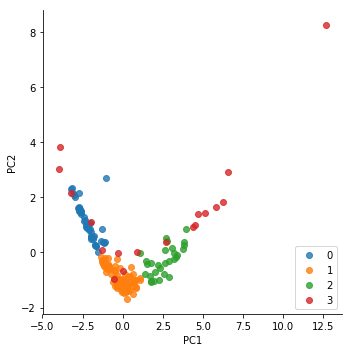

In [289]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC2", data=df_pca_with_outliers, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [290]:
df_pca_with_outliers.loc[(df_pca_with_outliers.cluster == 3) & (df_pca_with_outliers.PC1 >= 1.25), ['cluster']] = 2
df_pca_with_outliers.loc[(df_pca_with_outliers.cluster == 3) & (df_pca_with_outliers.PC1 >= -2.0) & (df_pca_with_outliers.PC1 < 1.25), ['cluster']] = 1
df_pca_with_outliers.loc[(df_pca_with_outliers.cluster == 3) & (df_pca_with_outliers.PC1 < -2.0), ['cluster']] = 0

In [291]:
df_pca_with_outliers.cluster.value_counts()

1    81
0    48
2    38
Name: cluster, dtype: int64

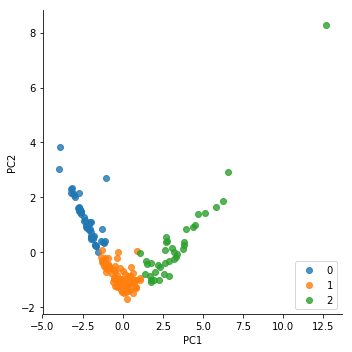

In [292]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC2", data=df_pca_with_outliers, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

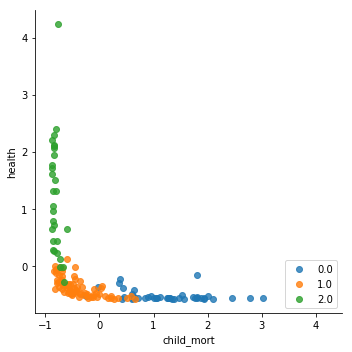

In [293]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="child_mort", y="health", data=df_pca_hir_original, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

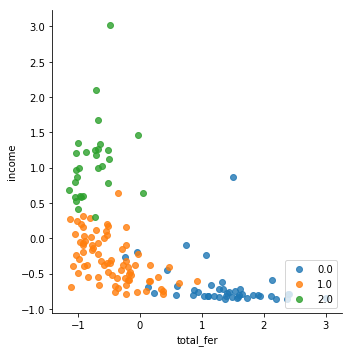

In [294]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="total_fer", y="income", data=df_pca_hir_original, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

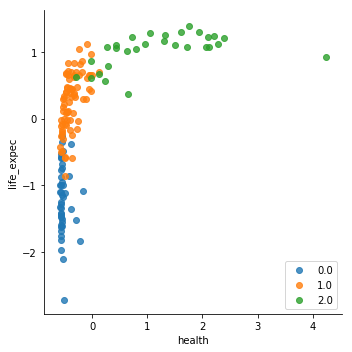

In [295]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="health", y="life_expec", data=df_pca_hir_original, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [297]:
df_pca_with_outliers[df_pca_with_outliers.cluster == 0].to_csv('Countries need help.csv')

In [298]:
df_pca_with_outliers[df_pca_with_outliers.cluster == 0].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Kiribati', 'Lao',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania',
       'Togo', 'Uganda', 'Yemen', 'Zambia', 'Central African Republic',
       'Haiti', 'Nigeria', 'Timor-Leste'],
      dtype='object', name='country')

All these 48 nations needs help from NGO

Inflation, Child_mortality, life_expectency, health, total_fertility and GDPP are the feature which influence this model